## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing the Dataset

In [2]:
dataset= pd.read_csv('Yahoo_Finance.csv')  
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-31,10.56,10.87,10.50,10.63,10.033685,45900
1,2012-11-01,10.71,11.41,10.59,11.22,10.590586,66400
2,2012-11-02,11.22,11.22,10.83,10.85,10.241342,38600
3,2012-11-05,10.99,11.40,10.86,11.27,10.637783,48600
4,2012-11-06,11.27,11.44,11.14,11.43,10.788806,28200


## Pre-preocessing the Dataset

In [3]:
import datetime as dt
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date']=dataset['Date'].map(dt.datetime.toordinal)

indexDataset = dataset.set_index(['Date'])

indexDataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
734807,10.56,10.87,10.50,10.63,10.033685,45900
734808,10.71,11.41,10.59,11.22,10.590586,66400
734809,11.22,11.22,10.83,10.85,10.241342,38600
734812,10.99,11.40,10.86,11.27,10.637783,48600
734813,11.27,11.44,11.14,11.43,10.788806,28200


In [4]:
indexDataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
734807,10.560000,10.870000,10.500000,10.630000,10.033685,45900
734808,10.710000,11.410000,10.590000,11.220000,10.590586,66400
734809,11.220000,11.220000,10.830000,10.850000,10.241342,38600
734812,10.990000,11.400000,10.860000,11.270000,10.637783,48600
734813,11.270000,11.440000,11.140000,11.430000,10.788806,28200
...,...,...,...,...,...,...
737354,21.629999,21.790001,21.379999,21.389999,21.389999,39100
737355,21.400000,21.530001,21.370001,21.459999,21.459999,67100
737356,21.600000,21.639999,21.400000,21.600000,21.600000,74300


In [5]:
X = dataset.iloc[:, 0:2].values  
y = dataset['Close']

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

## Multiple Linear Regression Implementation

In [8]:
classifier = LinearRegression()  
classifier.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred = classifier.predict(X_test)  

## Visualizing the Output

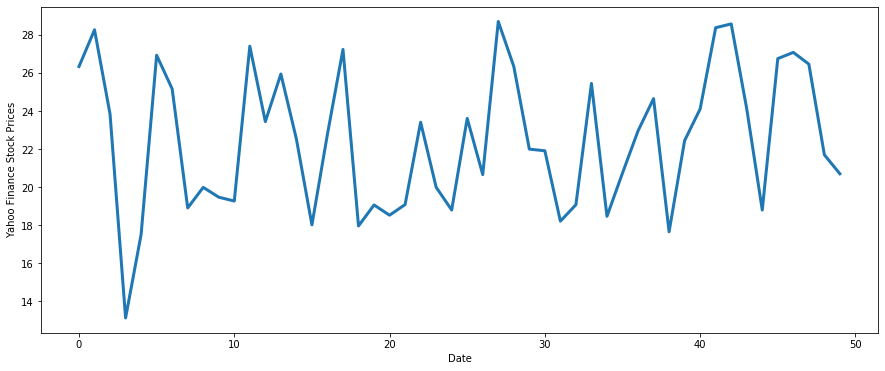

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

plt.xlabel("Date")
plt.ylabel("Yahoo Finance Stock Prices")
plt.plot(y_pred[:50],linewidth=3.0)

In [11]:
tt=y_test
tt.reset_index(drop=True, inplace=True)

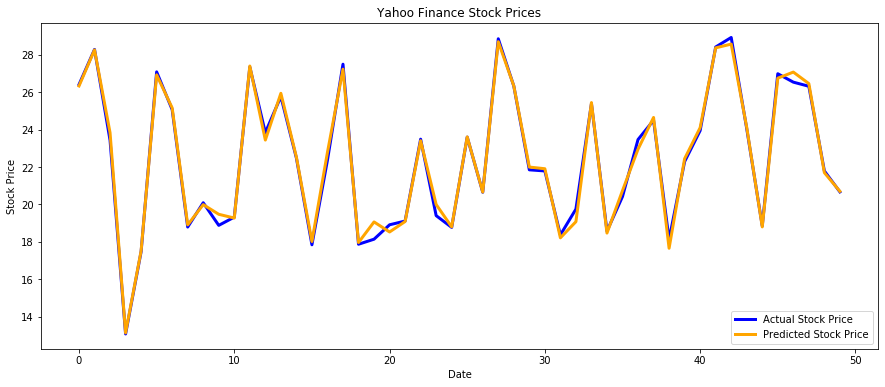

In [12]:
plt.plot(tt[:50], color = 'blue', label = 'Actual Stock Price',linewidth=3.0)
plt.plot(y_pred[:50], color = 'orange', label = 'Predicted Stock Price',linewidth=3.0)
plt.title('Yahoo Finance Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [13]:
y_pred

array([26.33524007, 28.26564827, 23.83457178, 13.12694199, 17.51513775,
       26.92945185, 25.16159618, 18.9065502 , 19.98904453, 19.47184833,
       19.27018061, 27.4027502 , 23.44235604, 25.94309883, 22.52804245,
       18.01727316, 22.78597221, 27.23455496, 17.96157386, 19.06335455,
       18.52577185, 19.0846157 , 23.4079189 , 19.99437631, 18.79889402,
       23.61082734, 20.65919011, 28.70337249, 26.33886237, 21.99753291,
       21.90903225, 18.21274219, 19.07589318, 25.44750205, 18.4671621 ,
       20.73943403, 22.95502265, 24.65104907, 17.65500247, 22.44460238,
       24.10752249, 28.37487546, 28.57459262, 24.11749834, 18.79749933,
       26.75239649, 27.07790558, 26.46299329, 21.69724344, 20.70057752,
       16.84976199, 21.00476823, 17.67587532, 24.72710308, 14.59783206,
       18.70829269, 19.38136323, 19.50025546, 23.58176072, 27.67194302,
       15.47084745, 27.4614723 , 14.70694204, 21.29606974, 18.7182908 ,
       21.72281749, 19.30465461, 22.7866337 , 19.05719072, 22.67

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)

In [15]:
print(test_set_rmse)

0.38348531583552437


In [16]:
fit = classifier.fit(X,y)

In [17]:
fit.score(X,y)

0.9920622166959187